# NHS Patient Survey Analysis
This notebook analyses patient satisfaction vs waiting times using the provided `survey_data.csv`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
df = pd.read_csv('survey_data.csv')
print('Data loaded. Rows:', len(df))
display(df.head())


Data loaded. Rows: 10


,respondent_id,overall_satisfaction,waiting_time_minutes,would_recommend
0,1,4,30,Yes
1,2,5,45,Yes
2,3,3,120,No
3,4,4,60,Yes
4,5,2,90,No


In [2]:
# Basic statistics
print('Average satisfaction:', df['overall_satisfaction'].mean())
print('Median waiting time:', df['waiting_time_minutes'].median())
print('\nRecommendation counts:')
print(df['would_recommend'].value_counts())


Average satisfaction: 3.9
Median waiting time: 42.5

Recommendation counts:
would_recommend
Yes    7
No     3
Name: count, dtype: int64


In [3]:
# Correlation
corr = df['overall_satisfaction'].corr(df['waiting_time_minutes'])
print('Correlation between satisfaction and waiting time:', round(corr,3))


Correlation between satisfaction and waiting time: -0.77


Saved survey_waiting_vs_satisfaction.png


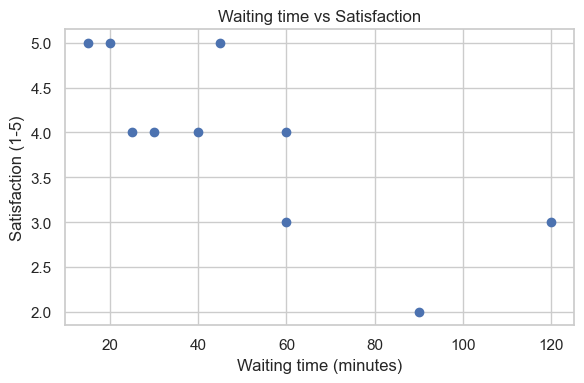

In [4]:
# Scatter plot: waiting time vs satisfaction
plt.figure(figsize=(6,4))
plt.scatter(df['waiting_time_minutes'], df['overall_satisfaction'])
plt.xlabel('Waiting time (minutes)')
plt.ylabel('Satisfaction (1-5)')
plt.title('Waiting time vs Satisfaction')
plt.tight_layout()
plt.savefig('survey_waiting_vs_satisfaction.png')
print('Saved survey_waiting_vs_satisfaction.png')


In [5]:
# Grouped analysis: avg satisfaction by waiting time bucket
bins = [0,30,60,90,999]
labels = ['0-30','31-60','61-90','90+']
df['wait_bucket'] = pd.cut(df['waiting_time_minutes'], bins=bins, labels=labels, include_lowest=True)
grouped = df.groupby('wait_bucket')['overall_satisfaction'].agg(['mean','count']).reset_index()
display(grouped)
grouped.to_csv('survey_grouped_satisfaction.csv', index=False)
print('Saved survey_grouped_satisfaction.csv')


C:\Users\wwwdh\AppData\Local\Temp\ipykernel_16080\554651984.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('wait_bucket')['overall_satisfaction'].agg(['mean','count']).reset_index()


,wait_bucket,mean,count
0,0-30,4.5,4
1,31-60,4.0,4
2,61-90,2.0,1
3,90+,3.0,1


Saved survey_grouped_satisfaction.csv
